In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import folium

In [91]:
df = pd.read_csv('fatalities.csv')
df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


In [93]:
# Display basic information about the dataset
print("Initial Dataset Info:")
print(df.info())
print("\nInitial Dataset Description:")


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 no

In [95]:
print(df.describe(include='all'))

                            name date_of_event           age  citizenship  \
count                      11124         11124  10995.000000        11124   
unique                     11083          2405           NaN            4   
top     Name unknown to B'Tselem    2008-12-27           NaN  Palestinian   
freq                          23           357           NaN        10092   
mean                         NaN           NaN     26.745703          NaN   
std                          NaN           NaN     13.780548          NaN   
min                          NaN           NaN      1.000000          NaN   
25%                          NaN           NaN     19.000000          NaN   
50%                          NaN           NaN     23.000000          NaN   
75%                          NaN           NaN     31.000000          NaN   
max                          NaN           NaN    112.000000          NaN   

       event_location event_location_district event_location_region  \
coun

In [97]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


The average age of the dead is 26, and the oldest person was 112 years old. On the other hand, the youngest individual counted among the dead is a baby who was only 1 year old

In [100]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [102]:
# Handle missing values
# For simplicity, we'll drop rows with missing values, but you can also use imputation techniques
df = df.dropna()

In [104]:
# Check for duplicates
df = df.drop_duplicates()

In [106]:
# Convert data types if necessary
# For example, if there are date columns that are not in datetime format
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])

In [108]:
# Display cleaned dataset information
print("\nCleaned Dataset Info:")
print(df.info())
print("\nCleaned Dataset Description:")
print(df.describe(include='all'))


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4661 entries, 6 to 11121
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4661 non-null   object 
 1   date_of_event                 4661 non-null   object 
 2   age                           4661 non-null   float64
 3   citizenship                   4661 non-null   object 
 4   event_location                4661 non-null   object 
 5   event_location_district       4661 non-null   object 
 6   event_location_region         4661 non-null   object 
 7   date_of_death                 4661 non-null   object 
 8   gender                        4661 non-null   object 
 9   took_part_in_the_hostilities  4661 non-null   object 
 10  place_of_residence            4661 non-null   object 
 11  place_of_residence_district   4661 non-null   object 
 12  type_of_injury                4661 non-null

In [110]:
df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-09-19,M,No,Khan Yunis,Khan Yunis,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while participating i...
94,Iyad al-'Abed al-Hasani,2023-05-12,51.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-12,M,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces,Senior Islamic Jihad military wing operative. ...
95,Muhammad Walid Muhammad 'Abd al-'Aal,2023-05-12,33.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-12,M,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces,Killed together with another Islamic Jihad mil...
96,'Ali Hassan Muhammad Ghali,2023-05-11,49.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-05-11,M,Yes,Khan Yunis,Khan Yunis,gunfire,missile,Israeli security forces,Senior Islamic Jihad military wing operative. ...
98,Mahmoud Walid Mahmoud 'Abd al-Jawad,2023-05-11,25.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-05-11,M,Yes,Rafah,Rafah,gunfire,missile,Israeli security forces,"Killed together with two of his uncles, one of..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,Hanan Levy,2000-11-02,33.0,Israeli,Jerusalem,Israel,Israel,2000-11-02,M,Israelis,Jerusalem,Israel,explosion,car bomb,Palestinian civilians,killed in a booby-trapped car near the Mahane ...
11116,Eish Kodesh Gilmor,2000-10-30,25.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2000-10-30,M,Israelis,Mevo Modi'im,Israel,gunfire,live ammunition,Palestinian civilians,Killed while he was guarding a National Insura...
11118,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians,His body was found burnt in his car.
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.


In [112]:
df.drop("notes", inplace=True, axis=1)

In [114]:
df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-09-19,M,No,Khan Yunis,Khan Yunis,gunfire,live ammunition,Israeli security forces
94,Iyad al-'Abed al-Hasani,2023-05-12,51.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-12,M,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces
95,Muhammad Walid Muhammad 'Abd al-'Aal,2023-05-12,33.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-05-12,M,Yes,a-Shati' Camp,Gaza,gunfire,missile,Israeli security forces
96,'Ali Hassan Muhammad Ghali,2023-05-11,49.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-05-11,M,Yes,Khan Yunis,Khan Yunis,gunfire,missile,Israeli security forces
98,Mahmoud Walid Mahmoud 'Abd al-Jawad,2023-05-11,25.0,Palestinian,Khan Yunis,Khan Yunis,Gaza Strip,2023-05-11,M,Yes,Rafah,Rafah,gunfire,missile,Israeli security forces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,Hanan Levy,2000-11-02,33.0,Israeli,Jerusalem,Israel,Israel,2000-11-02,M,Israelis,Jerusalem,Israel,explosion,car bomb,Palestinian civilians
11116,Eish Kodesh Gilmor,2000-10-30,25.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2000-10-30,M,Israelis,Mevo Modi'im,Israel,gunfire,live ammunition,Palestinian civilians
11118,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians


In [118]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

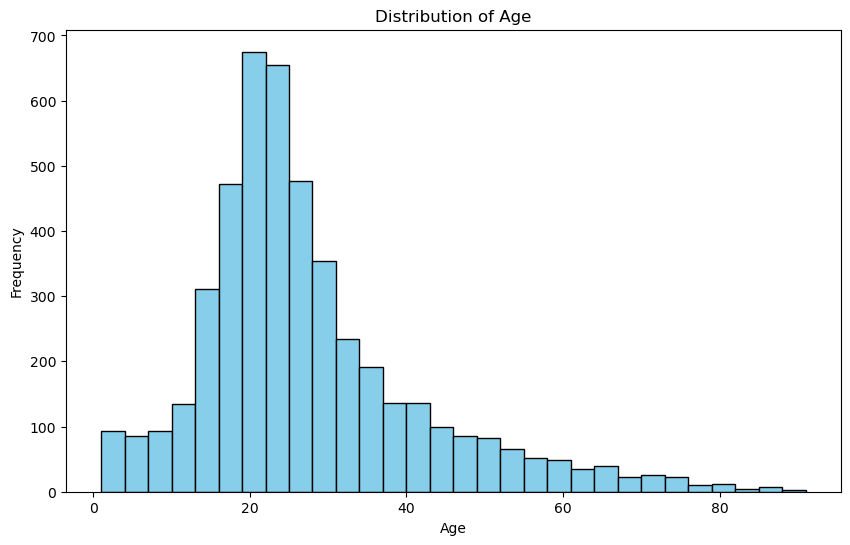

In [120]:
# Plot a histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

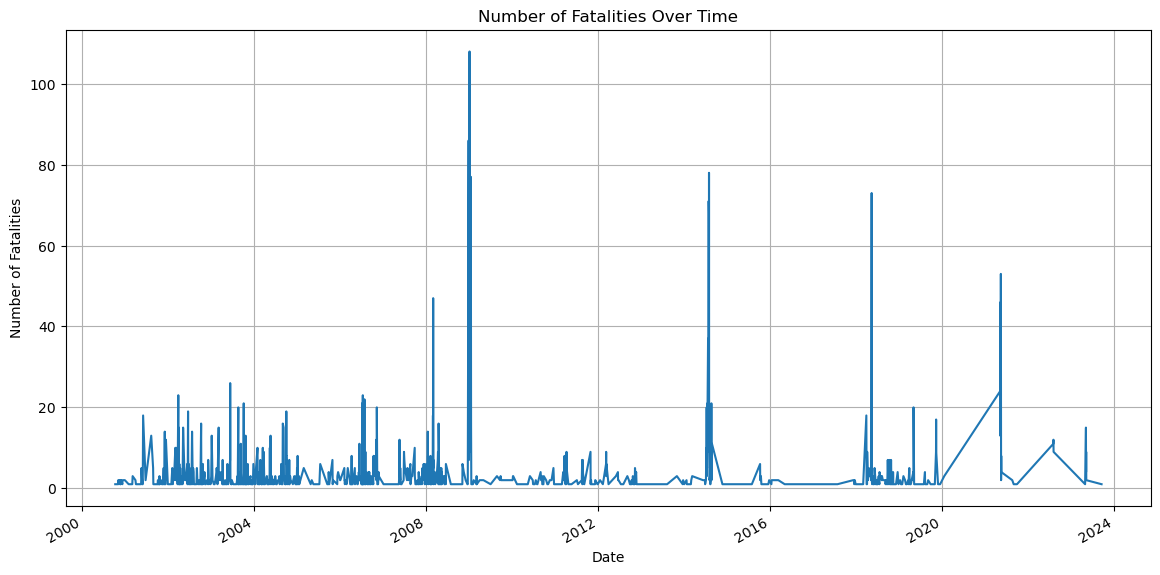

In [124]:
plt.figure(figsize=(14, 7))
df['date_of_event'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Fatalities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

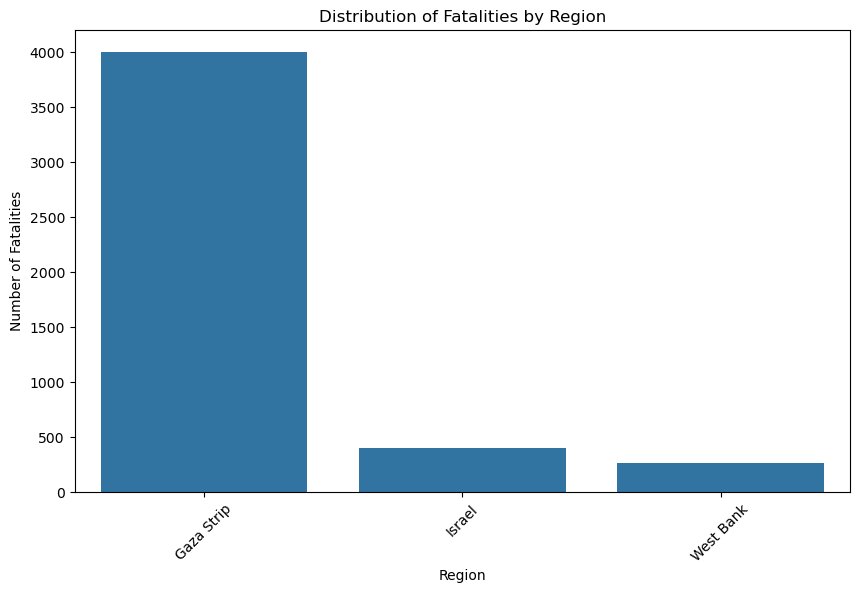

In [126]:
# Distribution of fatalities by region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='event_location_region', order=df['event_location_region'].value_counts().index)
plt.title('Distribution of Fatalities by Region')
plt.xlabel('Region')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()


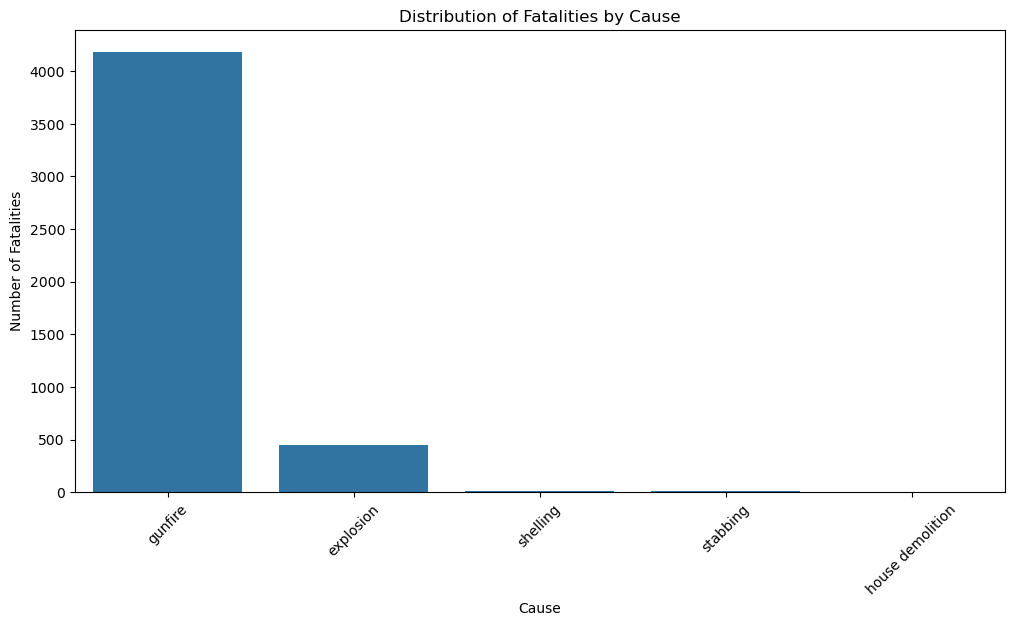

In [128]:
# Distribution of fatalities by cause (assuming there is a cause column)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type_of_injury', order=df['type_of_injury'].value_counts().index)
plt.title('Distribution of Fatalities by Cause')
plt.xlabel('Cause')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()

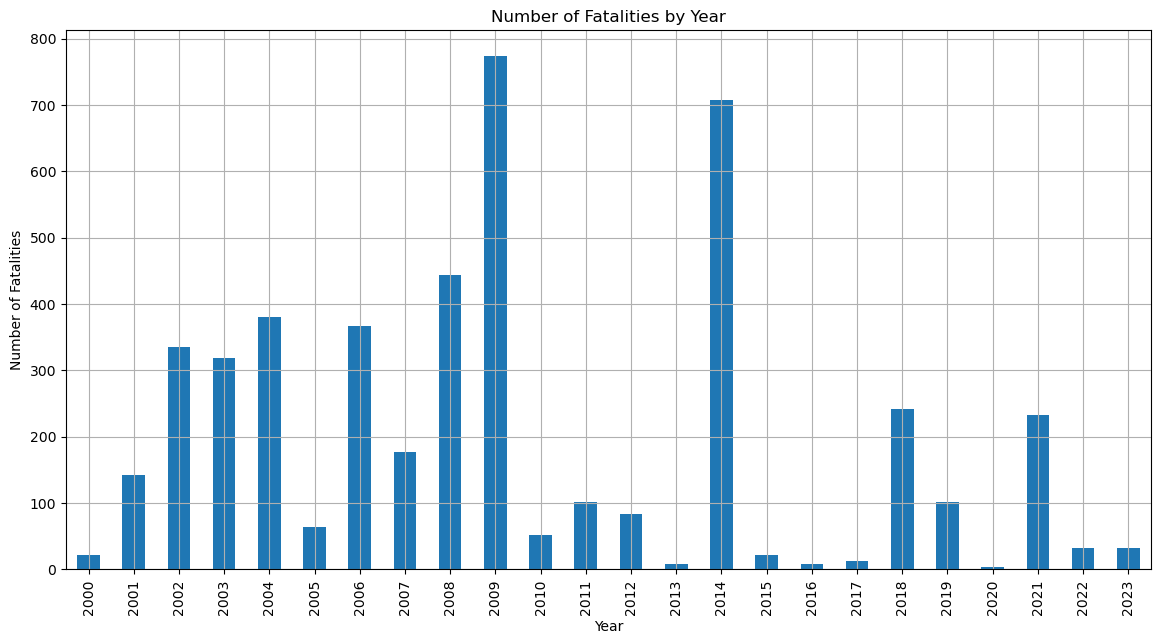

In [132]:
# Trends in fatalities by year
df['year'] = df['date_of_event'].dt.year
plt.figure(figsize=(14, 7))
df.groupby('year').size().plot(kind='bar')
plt.title('Number of Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()


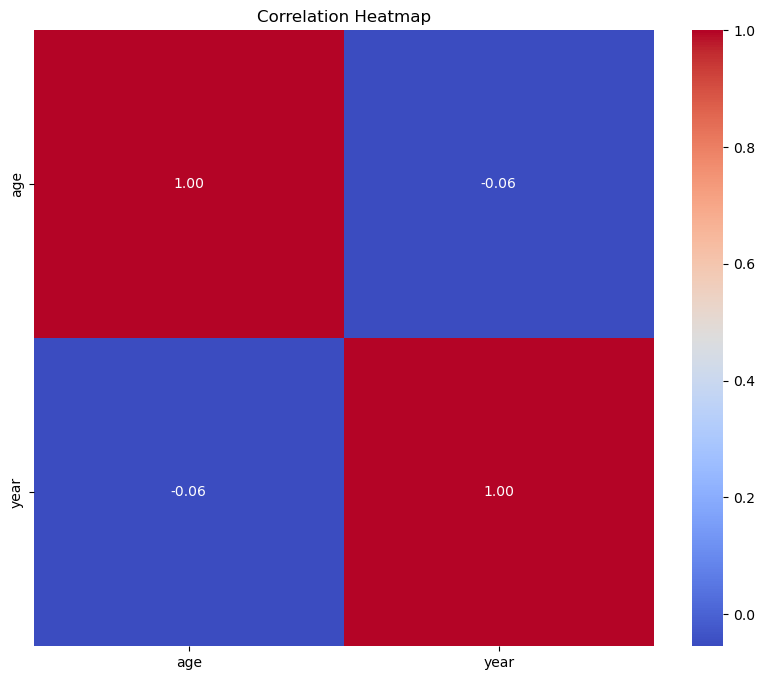

In [146]:
# Convert date columns to datetime format if not already done
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Add 'year' column if it is relevant to the data
numerical_df['year'] = df['date_of_event'].dt.year

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Age Distribution of Fatalities

The occupation army targets civilians, including innocent children, women and defenseless yout¶

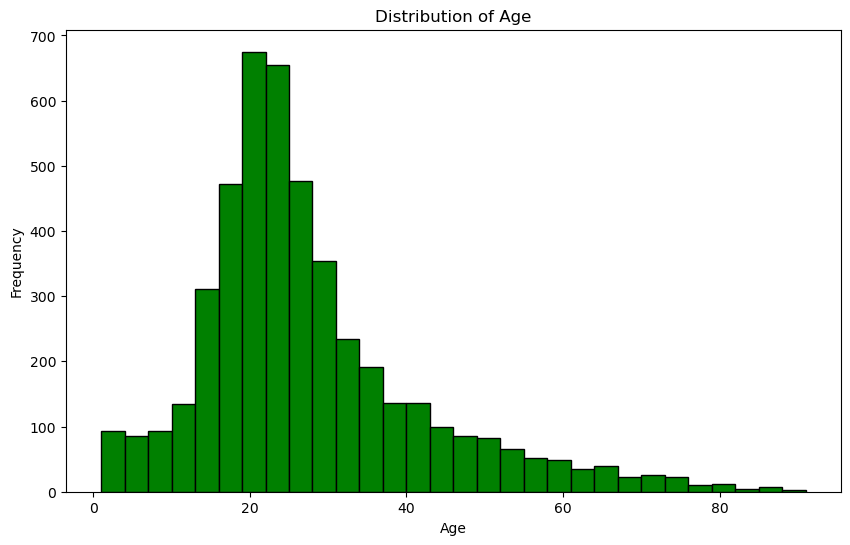

In [152]:
# Plot a histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The graphs above show the distribution by age of individuals killed between Israelis and Palestinians.

We can see that the majority of those killed are young people between the ages of 15 and 30. Young children are also among the fatalities and there is a decline with increasing age.

The data shows that young people and children are the biggest victims of fatalities.

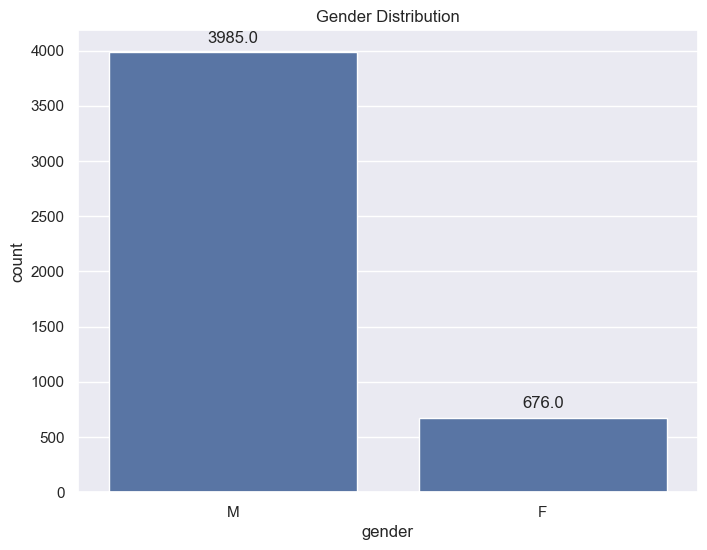

In [159]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")  # Set the style, if desired

# Plot the countplot
ax = sns.countplot(x='gender', data=df)

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution')
plt.show()

Gender Distribution of Fatalities

The brutal occupation does not differentiate between men and women, between young men and old men, everyone kills!!!es

In [162]:
citizenship_counts = df['citizenship'].value_counts() #Distribution of Fatalities by Citizenship

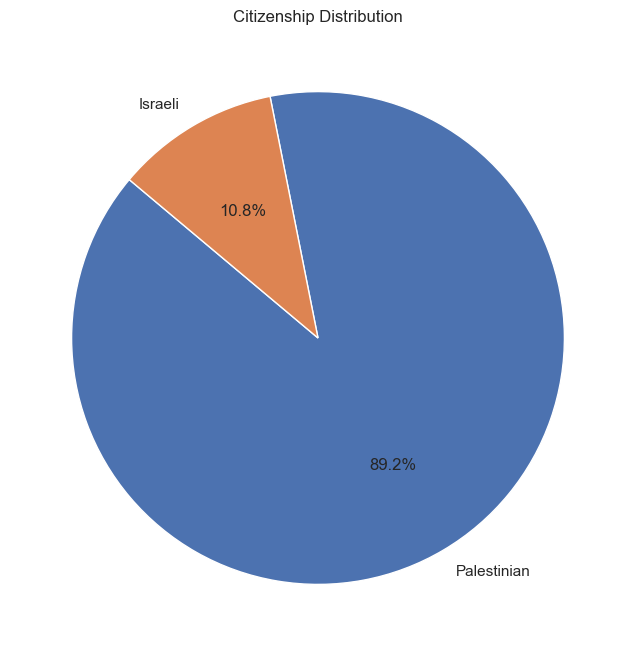

In [164]:
# Pie Chart for Citizenship Distribution
plt.figure(figsize=(8, 8))
plt.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Citizenship Distribution')
plt.show()

We can see that the majority of the dead are Palestinians, representing 89.2% of the total dead

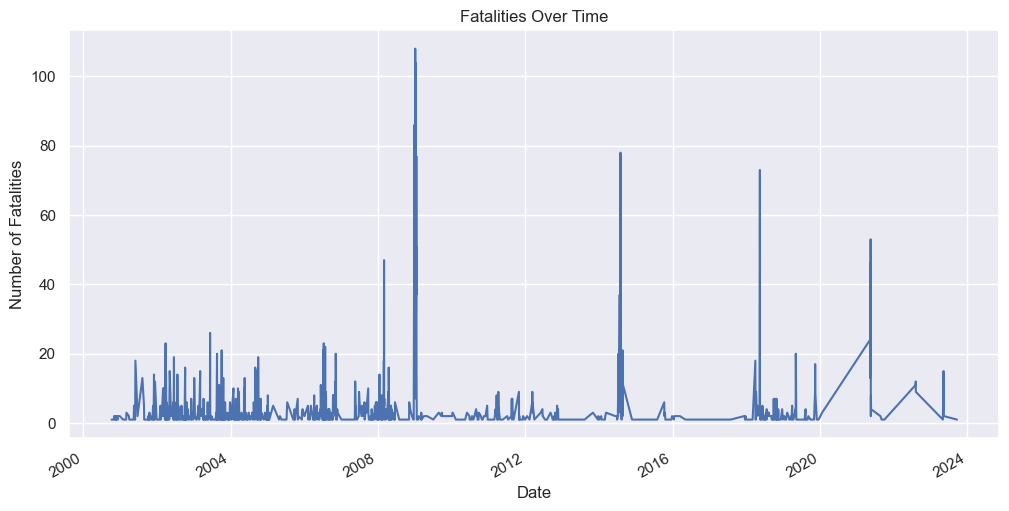

In [168]:
# Group by date and count the number of fatalities
fatalities_over_time = df.groupby('date_of_event').size()

# Create a time series plot
plt.figure(figsize=(12, 6))
fatalities_over_time.plot()
plt.title('Fatalities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.show()

Fatality Trends from 2000 to 2023

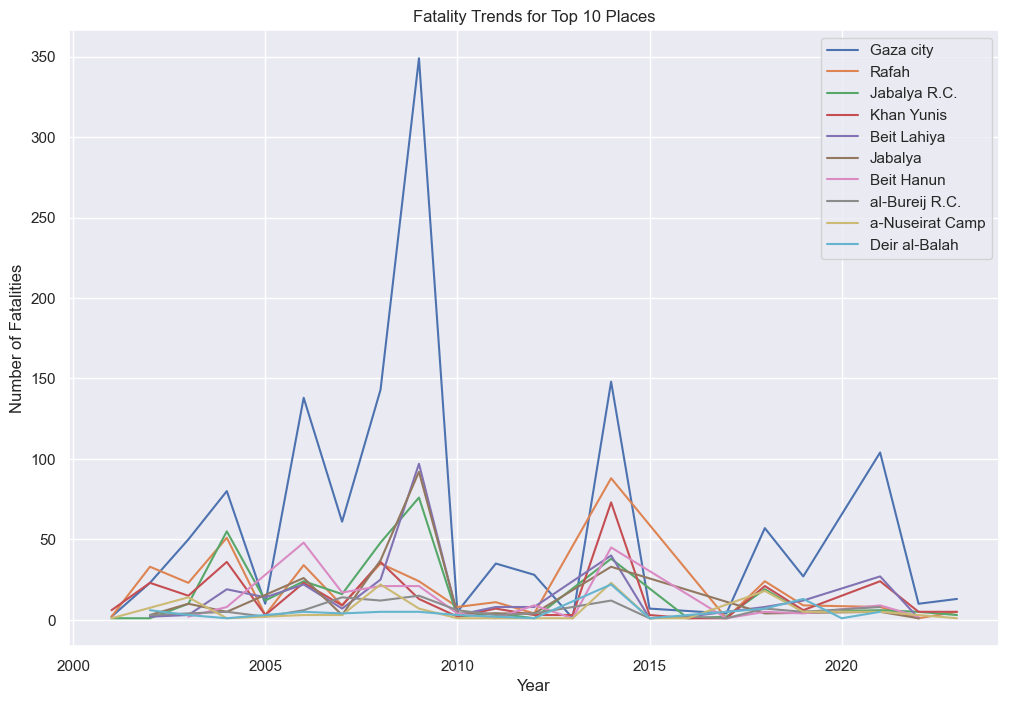

In [171]:
df['year'] = df['date_of_event'].dt.year

# Choose the top N places to focus on
top_n_places = 10  # You can adjust this number as needed

# Get the top N places with the highest total fatalities
top_places = df['place_of_residence'].value_counts().nlargest(top_n_places).index

# Filter the data to include only the top N places
filtered_data = df[df['place_of_residence'].isin(top_places)]

# Group by place and year, and sum the number of fatalities
fatalities_by_place = filtered_data.groupby(['place_of_residence', 'year']).size().reset_index(name='fatalities_count')

# Create a line plot for each place
plt.figure(figsize=(12, 8))

for place in top_places:
    data = fatalities_by_place[fatalities_by_place['place_of_residence'] == place]
    plt.plot(data['year'], data['fatalities_count'], label=place)

plt.title(f'Fatality Trends for Top {top_n_places} Places')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.show()

Distribution of Fatalities by District

In [186]:
# Redefining the approximate coordinates for major districts
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286]
}

# Get fatality counts for each district
district_fatalities = df.groupby('event_location_district').size()

# Function to determine the color of the circle based on the number of fatalities
def get_color(fatalities):
    if fatalities > 500:
        return 'purple'
    elif fatalities > 100:
        return 'blue'
    elif fatalities > 50:
        return 'red'
    else:
        return 'green'

# Create a base map centered around the region
m = folium.Map(location=[31.5, 34.75], zoom_start=8, tiles='OpenStreetMap')


# Add markers and circles for districts
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'{district}: {fatalities} fatalities',
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 1000,  # scale radius for better visualization
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.6,
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

m

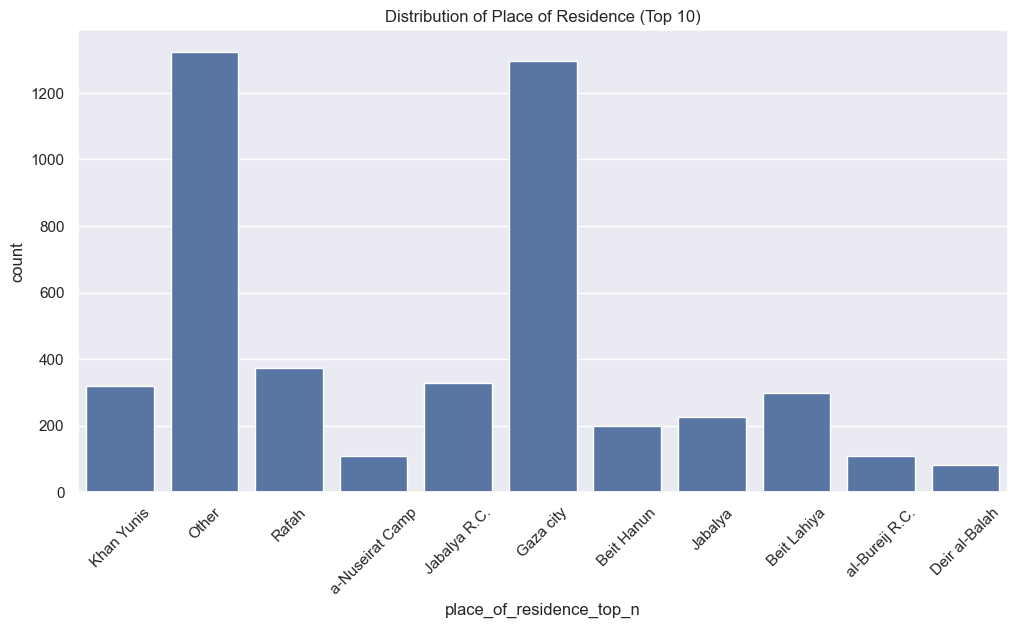

In [188]:
# Categorical Analysis - Place of Residence (Top N)
top_n = 10  # Set the number of top categories to display

# Get the top N categories
top_n_categories = df['place_of_residence'].value_counts().nlargest(top_n).index

# Replace less frequent categories with 'Other'
df['place_of_residence_top_n'] = df['place_of_residence'].apply(lambda x: x if x in top_n_categories else 'Other')

plt.figure(figsize=(12, 6))
sns.countplot(x='place_of_residence_top_n', data=df)
plt.title('Distribution of Place of Residence (Top {})'.format(top_n))
plt.xticks(rotation=45)
plt.show()

Distribution of Place of Residence

In [191]:
# Count the number of occurrences for each category in 'took_part_in_the_hostilities'
participation_counts = df['took_part_in_the_hostilities'].value_counts()
participation_counts

took_part_in_the_hostilities
No                            2330
Yes                           1512
Israelis                       502
Object of targeted killing     170
Unknown                        147
Name: count, dtype: int64

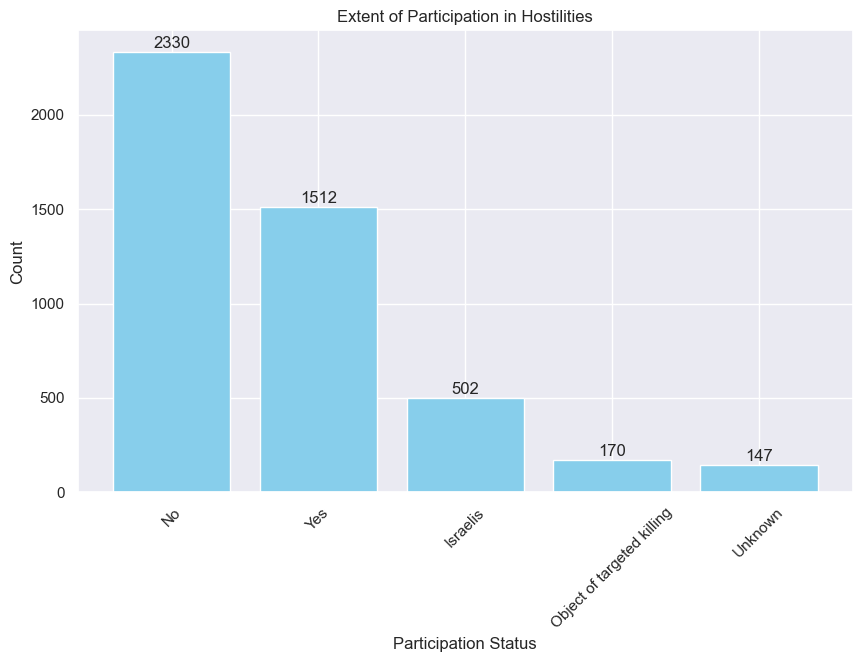

In [193]:
# Create a bar plot to visualize the extent of participation
plt.figure(figsize=(10, 6))
plt.bar(participation_counts.index, participation_counts.values, color='skyblue')

for i, count in enumerate(participation_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.title('Extent of Participation in Hostilities')
plt.xlabel('Participation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Distribution Based on Participation in Hostilities

The graph shows that the majority of the dead had no participation in the hostilities, accounting for about 50 percent of the total dead.

Next, we can see thaabout t236 pr cent of the dead took part in the hostilities.About 3

6per cent are not knoabout 11 , 8per cent were killed by the Israelis, whabout 4le 2per cent of the dead were targeted.

In [197]:
# Count the occurrences of each type of injury
injury_counts = df['type_of_injury'].value_counts()
print(injury_counts)

type_of_injury
gunfire             4181
explosion            452
shelling              13
stabbing              13
house demolition       2
Name: count, dtype: int64


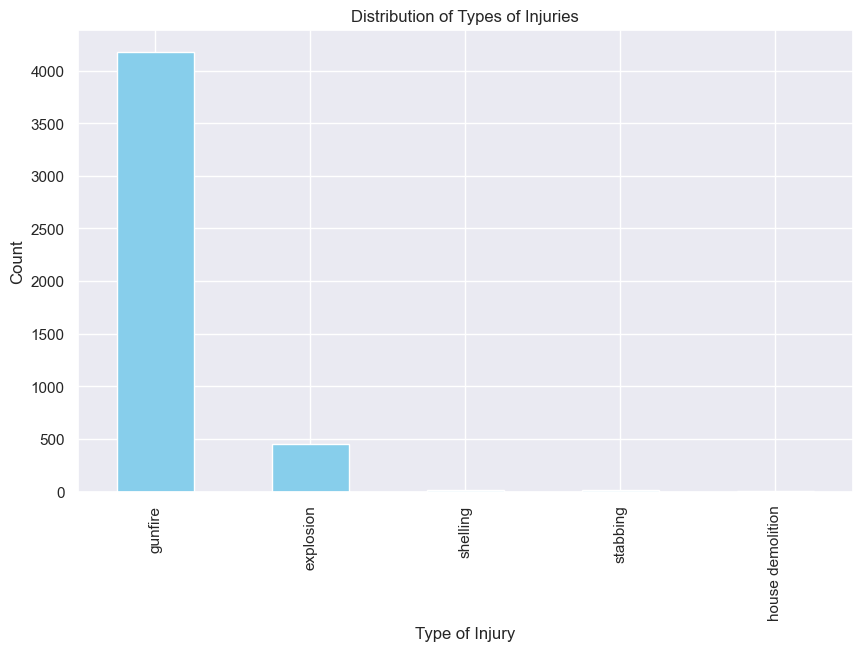

In [199]:
plt.figure(figsize=(10, 6))
injury_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Types of Injuries')
plt.xlabel('Type of Injury')
plt.ylabel('Count')
plt.show()

Distribution of Types of Injuries
There are many causes of death, but the killer is one

The graph shows that 90 percent of deaths were by firearm.

We can also see deaths by explosion account fo10 5% of the total deaths recorded

In [202]:
# Count the occurrences of each type of ammunition and means of killing
ammunition_counts = df['ammunition'].value_counts()
means_of_killing_counts = df['killed_by'].value_counts()

print("Ammunition used:")
print(ammunition_counts)

print("\nMeans of killing:")
print(means_of_killing_counts)

Ammunition used:
ammunition
missile                        2757
shell                           655
live ammunition                 586
explosive belt                  309
bomb                            209
mortar fire                      43
flechette shells                 19
phosphorus shell                 16
car bomb                         15
knife                            13
rubber-coated metal bullets      13
teargas canister                 10
Qassam rocket                     7
grad rocket                       5
grenade                           2
flare bomb                        1
stun grenade                      1
Name: count, dtype: int64

Means of killing:
killed_by
Israeli security forces    4153
Palestinian civilians       502
Israeli civilians             6
Name: count, dtype: int64


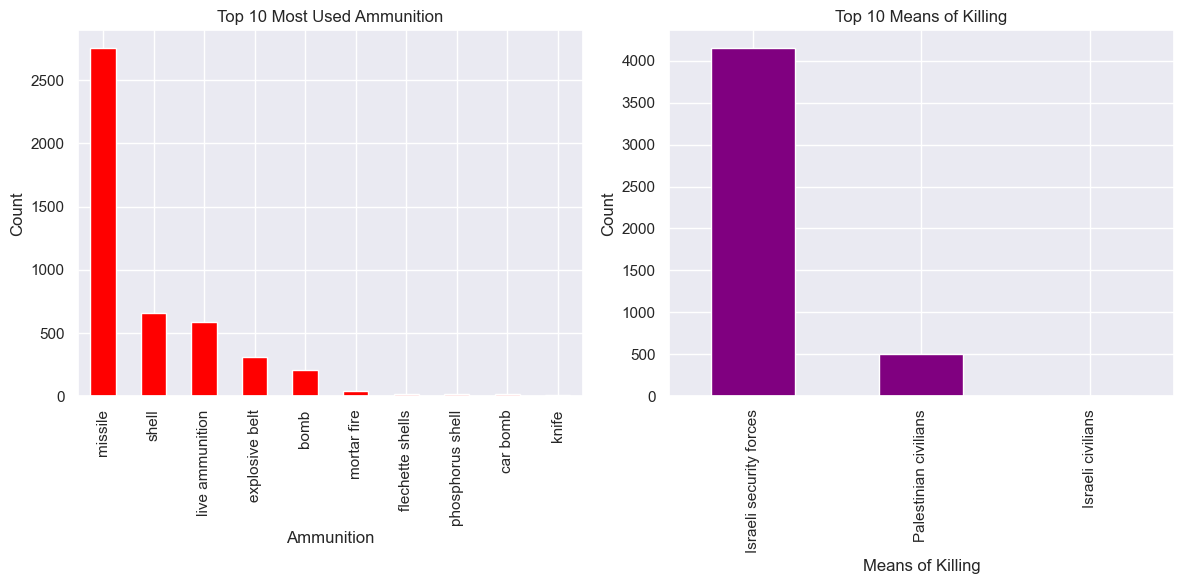

In [206]:
plt.figure(figsize=(12, 6))

# Plot ammunition
plt.subplot(1, 2, 1)
ammunition_counts.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Most Used Ammunition')
plt.xlabel('Ammunition')
plt.ylabel('Count')

# Plot means of killing
plt.subplot(1, 2, 2)
means_of_killing_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Means of Killing')
plt.xlabel('Means of Killing')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Type of ammunition and means of killing

The occupying army uses internationally prohibited incendiary bombs (phosphorus bombs) with the aim of exterminating the Palestinian people.

In [209]:
# Generate victim profiles based on age, gender, citizenship, and place of residence
victim_profiles = df[['age', 'gender', 'citizenship', 'place_of_residence']].copy()

# Display the first few rows of victim profiles
print(victim_profiles.head())

     age gender  citizenship place_of_residence
6   24.0      M  Palestinian         Khan Yunis
94  51.0      M  Palestinian      a-Shati' Camp
95  33.0      M  Palestinian      a-Shati' Camp
96  49.0      M  Palestinian         Khan Yunis
98  25.0      M  Palestinian              Rafah


In [211]:
# Analyze common characteristics
common_age_range = victim_profiles['age'].value_counts().idxmax()
common_gender = victim_profiles['gender'].value_counts().idxmax()
common_citizenship = victim_profiles['citizenship'].value_counts().idxmax()
common_place_of_residence = victim_profiles['place_of_residence'].value_counts().idxmax()

print(f"\nCommon Characteristics Among Victims:")
print(f"Most Common Age Range: {common_age_range}")
print(f"Most Common Gender: {common_gender}")
print(f"Most Common Citizenship: {common_citizenship}")
print(f"Most Common Place of Residence: {common_place_of_residence}")


Common Characteristics Among Victims:
Most Common Age Range: 23.0
Most Common Gender: M
Most Common Citizenship: Palestinian
Most Common Place of Residence: Gaza city


C:\Users\Mahmudur Rahman\AppData\Local\Temp\ipykernel_71092\84443332.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=victim_profiles, palette='pastel')


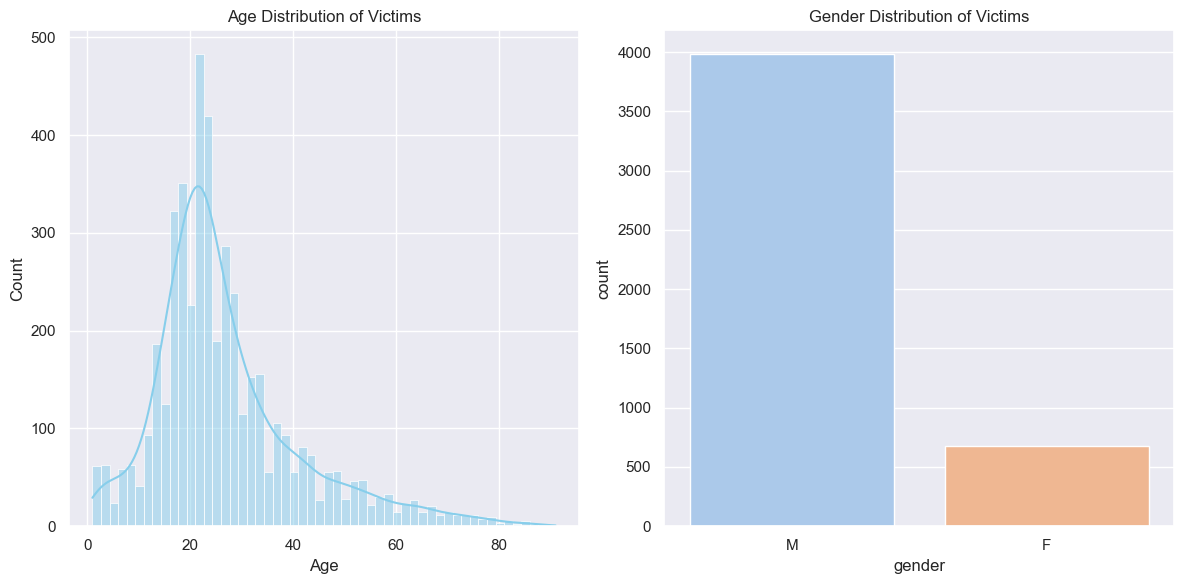

In [213]:
plt.figure(figsize=(12, 6))

# Plot Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(victim_profiles['age'], kde=True, color='skyblue')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')

# Plot Gender Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=victim_profiles, palette='pastel')
plt.title('Gender Distribution of Victims')

plt.tight_layout()
plt.show()

Victim Profiles
profiles of the victims based on the available data such as age, gender, citizenship, and place of residence.

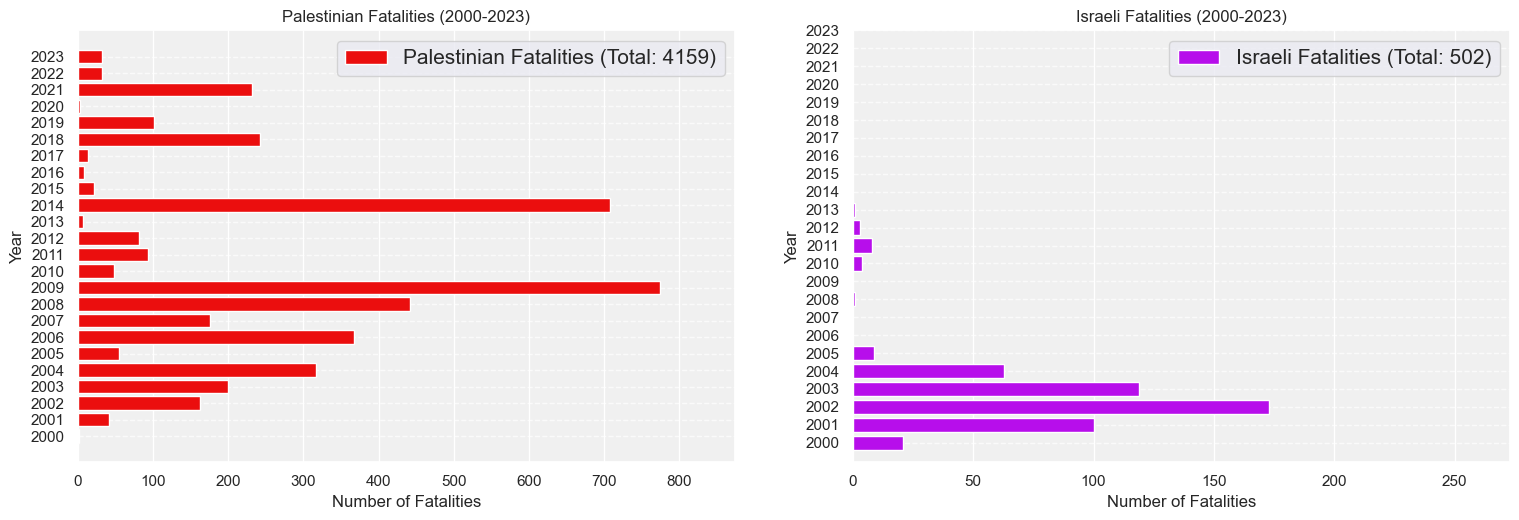

In [218]:
import matplotlib.pyplot as plt

# Create subplots with enhanced styling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define custom colors
palestinian_color = '#eb0e0e'  # red color for Palestinian chart
israeli_color = '#b70eeb'      # purple color for Israeli chart
total_text_color = '#2ca02c'  # Green color for total text

# Plot for Palestinian fatalities
palestinian_data = df[df['citizenship'] == 'Palestinian']

palestinian_fatalities_per_year = palestinian_data.groupby(palestinian_data['date_of_event'].dt.year)['name'].count()

axes[0].barh(palestinian_fatalities_per_year.index, palestinian_fatalities_per_year.values, color=palestinian_color)
axes[0].set_xlim(0, max(palestinian_fatalities_per_year.values) + 100)  # Adjust the x-limit
axes[0].set_xlabel('Number of Fatalities')
axes[0].set_ylabel('Year')
axes[0].set_title('Palestinian Fatalities (2000-2023)')

# Plot for Israeli fatalities
israeli_data = df[df['citizenship'] == 'Israeli']

israeli_fatalities_per_year = israeli_data.groupby(israeli_data['date_of_event'].dt.year)['name'].count()
axes[1].barh(israeli_fatalities_per_year.index, israeli_fatalities_per_year.values, color=israeli_color)

axes[1].set_xlim(0, max(israeli_fatalities_per_year.values) + 100)  # Set x-axis limits from 0 to max fatalities
axes[1].set_xlabel('Number of Fatalities')
axes[1].set_ylabel('Year')
axes[1].set_title('Israeli Fatalities (2000-2023)')

# Set y-axis labels with years
years = range(2000, 2024)
axes[0].set_yticks(years)
axes[0].set_yticklabels([str(year) for year in years])
axes[1].set_yticks(years)
axes[1].set_yticklabels([str(year) for year in years])

# Add a legend with total number of Palestinian fatalities
total_palestinian_fatalities = palestinian_fatalities_per_year.sum()
axes[0].legend(['Palestinian Fatalities (Total: {})'.format(total_palestinian_fatalities)], loc='upper right', fontsize=15)

# Add a legend with total number of Israeli fatalities
total_israeli_fatalities = israeli_fatalities_per_year.sum()
axes[1].legend(['Israeli Fatalities (Total: {})'.format(total_israeli_fatalities)], loc='upper right', fontsize=15)

# Add a horizontal grid for better readability
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color to the plots for better contrast
axes[0].set_facecolor('#f0f0f0')
axes[1].set_facecolor('#f0f0f0')

# Adjust layout and spacing
plt.tight_layout(pad=3)

# Show the plot
plt.show()

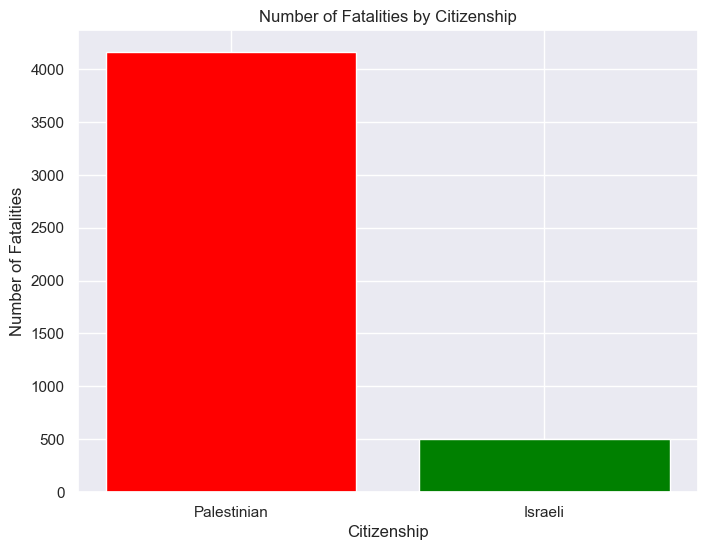

In [222]:
# Filter data for Palestinian and Israeli citizenship
palestinian_fatalities = df[df['citizenship'] == 'Palestinian']['name'].count()
israeli_fatalities = df[df['citizenship'] == 'Israeli']['name'].count()

# Create a bar chart
citizenship = ['Palestinian', 'Israeli']
fatalities = [palestinian_fatalities, israeli_fatalities]

plt.figure(figsize=(8, 6))
plt.bar(citizenship, fatalities, color=['red', 'green']) #This number of Palestinian martyrs doubled in the period from 7/10/2023 until the issuance of this notebook
plt.title('Number of Fatalities by Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Number of Fatalities')
plt.show()